### Creates a tSNE Visualization of the given PorphyStruct Result data

In [177]:
import pandas as pd
from data import constants
from mathutil import comp, percentage

In [178]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
dataset = df.loc[df["Class"] == "Corrole"]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_1604/3340571895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

### Prepare sklearn stuff

In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [180]:
preprocess = ColumnTransformer(
    transformers = [
        ("prepocess_ext", Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
                ("scaler", StandardScaler())
            ]
        ), constants.percColumns + ["DoopExp"])
    ], sparse_threshold=0)

### Do TSNE Computation

In [181]:
tsne = TSNE(n_components=2, random_state=69420, perplexity=50, n_iter=1000)
df_mapping = pd.DataFrame(tsne.fit_transform(preprocess.fit_transform(dataset)), columns=["x", "y"])


### Add Columns for Viz

In [182]:
df_mapping["M"] = dataset["Metal"]
df_mapping["Doop"] = dataset["DoopExp"]
df_mapping["Group"] = dataset["Group"].astype(str)
df_mapping["dominant"] = dataset["dominant"]


### Plot Stuff

In [183]:
! pip install plotnine

from plotnine import *

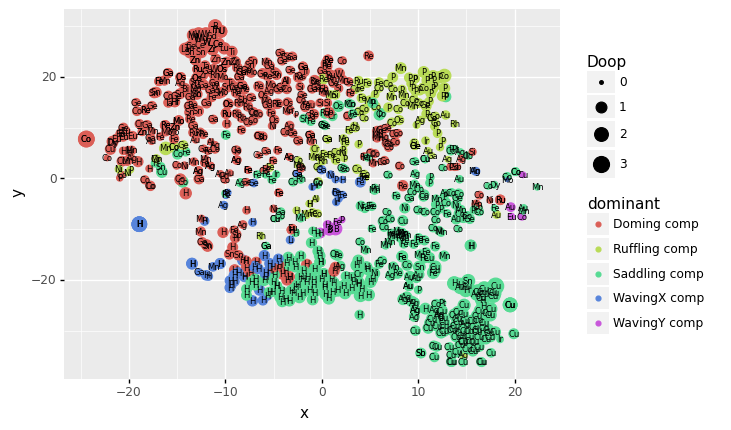

<ggplot: (98058914506)>

In [184]:
ggplot(df_mapping,aes(x="x", y="y", label="M")) + geom_point(aes(size="Doop", colour="dominant")) + geom_text(size=6)